In [79]:
from scipy.io.arff import loadarff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [69]:
raw_data = loadarff("jm1.arff")
data = pd.DataFrame(raw_data[0])
data["label"] = data["label"].apply(lambda x: x.decode())
data["label"] = data["label"].apply(lambda x: 1 if x == 'N' else 0)
data.shape

(7782, 22)

In [70]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop
data = data.drop(to_drop, axis=1)
data

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,HALSTEAD_EFFORT,HALSTEAD_LEVEL,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,label
0,1.0,7.0,0.0,0.0,3.0,1.0,11.0,25.05,11.20,3142.03,0.09,15.0,12.0,1
1,5.0,37.0,0.0,6.0,16.0,10.0,85.0,81.19,27.41,60987.96,0.04,59.0,22.0,1
2,2.0,1.0,0.0,0.0,1.0,1.0,10.0,56.44,2.83,453.08,0.35,15.0,5.0,0
3,16.0,1.0,0.0,0.0,1.0,1.0,52.0,168.57,16.97,48553.53,0.06,70.0,12.0,0
4,0.0,7.0,0.0,0.0,2.0,3.0,9.0,14.32,7.71,852.01,0.13,7.0,12.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,4.0,3.0,0.0,3.0,2.0,1.0,13.0,19.18,15.68,4717.53,0.06,11.0,15.0,1
7778,2.0,9.0,0.0,0.0,2.0,3.0,11.0,17.01,11.70,2328.73,0.09,10.0,13.0,1
7779,18.0,105.0,0.0,18.0,22.0,53.0,84.0,51.30,56.76,165253.09,0.02,37.0,25.0,0
7780,1.0,5.0,0.0,0.0,3.0,1.0,15.0,29.25,6.25,1142.73,0.16,12.0,10.0,1


[]

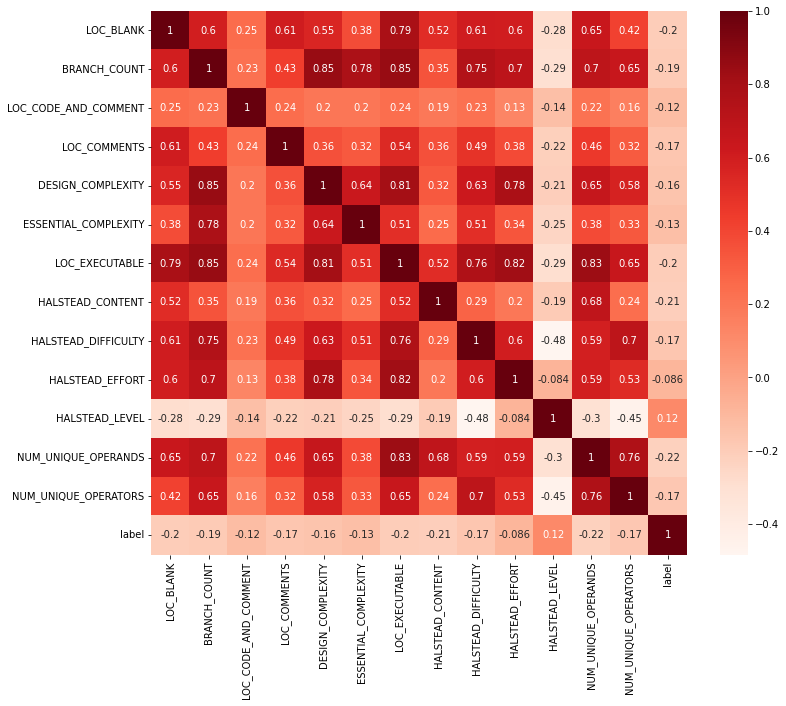

In [71]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
correlationMatrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlationMatrix, annot=True, cmap=plt.cm.Reds)
plt.plot()

In [72]:
knn = KNeighborsClassifier(n_neighbors=89)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(knn)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()

knn.fit(X_train_sfs, y_train)
knn.score(X_test_sfs, y_test)

0.7970021413276231

In [73]:
pos=sfs.get_support(True)

In [74]:
data_new=data.iloc[:,pos]
data_new.columns

Index(['LOC_BLANK', 'LOC_CODE_AND_COMMENT', 'LOC_EXECUTABLE',
       'HALSTEAD_EFFORT', 'HALSTEAD_LEVEL', 'NUM_UNIQUE_OPERANDS'],
      dtype='object')

In [77]:
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(gnb)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()

gnb.fit(X_train_sfs, y_train)
gnb.score(X_test_sfs, y_test)

0.7905781584582441

In [78]:
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
data_new.columns

Index(['LOC_BLANK', 'LOC_COMMENTS', 'HALSTEAD_EFFORT', 'HALSTEAD_LEVEL',
       'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS'],
      dtype='object')

In [80]:
dtc = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
sfs = SequentialFeatureSelector(dtc)
X_train_sfs = sfs.fit_transform(X_train, y_train)
X_test_sfs = sfs.transform(X_test)
sfs.get_support()

gnb.fit(X_train_sfs, y_train)
gnb.score(X_test_sfs, y_test)

0.7918629550321199

In [81]:
pos=sfs.get_support(True)
data_new=data.iloc[:,pos]
data_new.columns

Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY'],
      dtype='object')